In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import somsphere
import healpy as hp
import numpy as np

/Users/Matias/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
#just read magnitudes and colors
Data_X=np.loadtxt('SDSS_MGS.train', usecols=(1,2,3,4,5,6,7,8,9), unpack=True).T
np.shape(Data_X)

(5000, 9)

In [3]:
#read zspec (or any other extra column)
Data_Y=np.loadtxt('SDSS_MGS.train', usecols=(0,), unpack=True).T
np.shape(Data_Y)

(5000,)

In [4]:
#create an instance
M=somsphere.SelfMap(Data_X, Data_Y,topology='grid', Ntop=15, iterations=100, periodic='no')

In [5]:
M.create_map() #This actually creates the map using only Data_X

In [6]:
M.evaluate_map() # Will evaluate Data_Y, basically will take mean for every value of Y per cell

/Users/Matias/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/cbook.py:122: MatplotlibDeprecationWarning: The matplotlib.mpl module was deprecated in version 1.3. Use `import matplotlib as mpl` instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


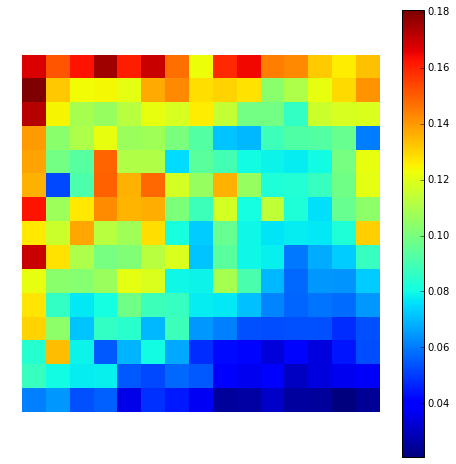

In [7]:
M.plot_map()

In [8]:
#We can evaluate other column, for example column 0 from X
M.evaluate_map(inputY=Data_X[:,0])

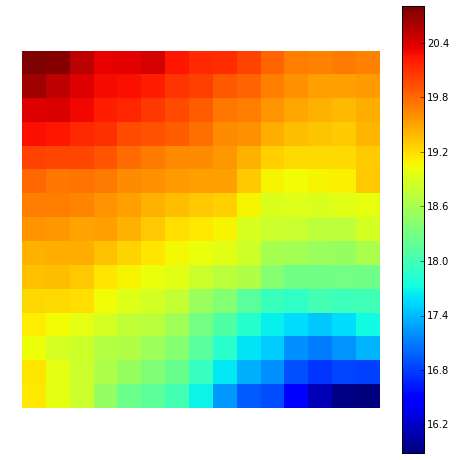

In [9]:
M.plot_map()

In [10]:
#Every time the map is created it will be different given the random weights
M.create_map()

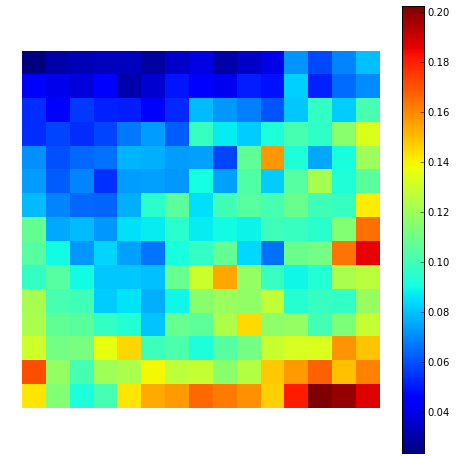

In [11]:
M.evaluate_map()
M.plot_map()

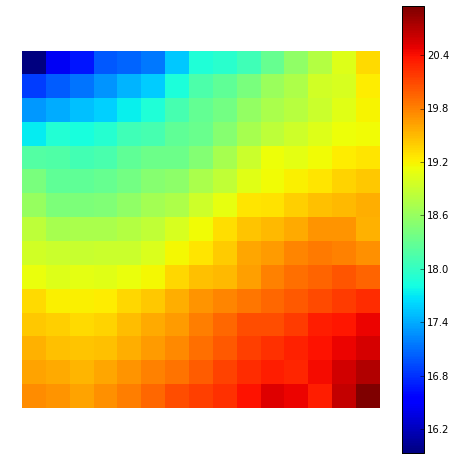

In [12]:
M.evaluate_map(inputY=Data_X[:,0])
M.plot_map()

In [14]:
#Spherical coordinates
M_sph=somsphere.SelfMap(Data_X, Data_Y,topology='sphere', Ntop=8, iterations=100)

In [15]:
M_sph.create_map()

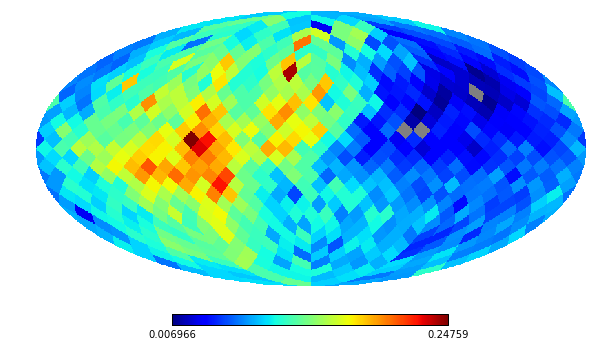

In [16]:
M_sph.evaluate_map()
M_sph.plot_map()


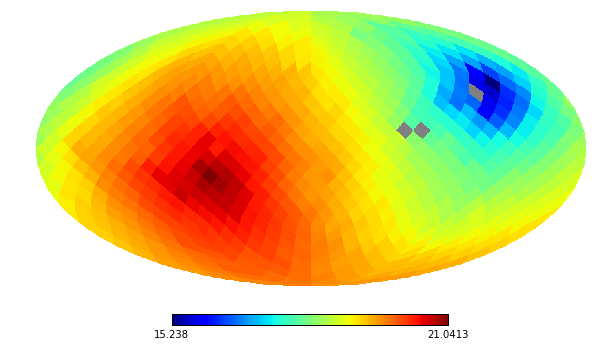

In [17]:
M_sph.evaluate_map(inputY=Data_X[:,0])
M_sph.plot_map()

## Test with fixed weights and fixed order of data presented

In [19]:
# To test with fixed weights, so answer is always the same (to be able to compare)
# need more iterations to make sure it converges
M=somsphere.SelfMap(Data_X, Data_Y,topology='grid', Ntop=15, iterations=300, periodic='no')
print M.nDim, 'dimensions' #dimensions
print M.npix, 'cells' #cells

9 dimensions
225 cells


In [20]:
#weights are supposed to be random, but we can make them linear for testing
W = np.linspace(0,20,M.nDim*M.npix).reshape(M.nDim,M.npix)
#look carefully onhow this was created, elements go from 0 to 20 with a difference of 
#W[0][1]-W[0][0] = 0.009881422924901186
print 'dw = ', W[0][1]-W[0][0]
np.shape(W)

dw =  0.0098814229249


(9, 225)

In [21]:
M.create_map(inputs_weights=W, random_order=False)

In [22]:
M.evaluate_map()

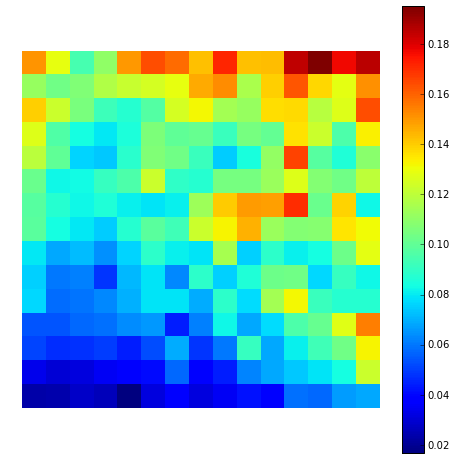

In [23]:
M.plot_map()

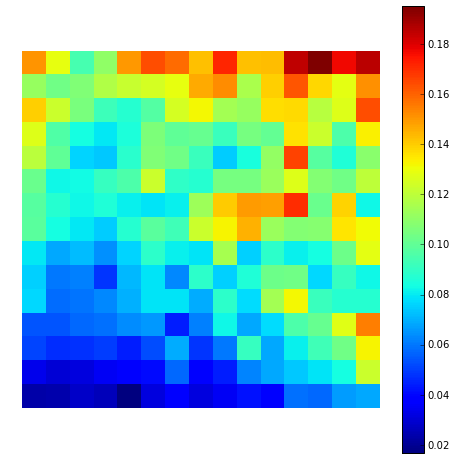

In [24]:
# If I create the map again, results should be the same
M.create_map(inputs_weights=W, random_order=False)
M.evaluate_map()
M.plot_map()

In [25]:
# To compare, we can use the resulting weights for cell 0
M.weights[:,0]

array([ 16.1580654 ,  14.33966559,  13.50589005,  13.13014191,
        12.84625795,   1.81839981,   0.83377553,   0.37574814,   0.28388396])

In [26]:
# in spherical
M_sph=somsphere.SelfMap(Data_X, Data_Y,topology='sphere', Ntop=8, iterations=300)

In [27]:
#weights, the number of pixels is different
#weights are supposed to be random, but we can make them linear for testing
W = np.linspace(0,20,M_sph.nDim*M_sph.npix).reshape(M_sph.nDim,M_sph.npix)
#look carefully onhow this was created, elements go from 0 to 20 with a difference of 
#W[0][1]-W[0][0] = 0.009881422924901186
print 'dw = ', W[0][1]-W[0][0]
np.shape(W)


dw =  0.00289393720156


(9, 768)

In [28]:
M_sph.create_map(inputs_weights=W, random_order=False)

KeyboardInterrupt: 

In [ ]:
M_sph.evaluate_map()
M_sph.plot_map()

In [ ]:
M_sph.evaluate_map(inputY=Data_X[:,0])
M_sph.plot_map()


In [ ]:
M_sph.create_map(inputs_weights=W, random_order=False)

In [ ]:
M_sph.evaluate_map()
M_sph.plot_map()

In [ ]:
#Weights for cell 0
M_sph.weights[:,0]

In [ ]:
# hexagonal topology with periodic conditions
M_hex=somsphere.SelfMap(Data_X, Data_Y,topology='hex', Ntop=15, iterations=300, periodic='yes')
print M_hex.nDim, 'dimensions' #dimensions
print M_hex.npix, 'cells' #cells

In [ ]:
W=np.linspace(0,20,M_hex.nDim*M_hex.npix).reshape(M_hex.nDim,M_hex.npix)
M_hex.create_map(inputs_weights=W, random_order=False)
M_hex.evaluate_map()
M_hex.plot_map()

In [ ]:
M_hex.evaluate_map(inputY=Data_X[:,0])
M_hex.plot_map()

# Random example test

In [21]:
X_R=np.random.rand(45000).reshape(5000,9)

In [22]:
np.shape(X_R)

(5000, 9)

In [23]:
M_sph_R=somsphere.SelfMap(X_R, X_R[:,0],topology='sphere', Ntop=8, iterations=100)

In [24]:
M_sph_R.create_map()

In [25]:
M_sph_R.evaluate_map()

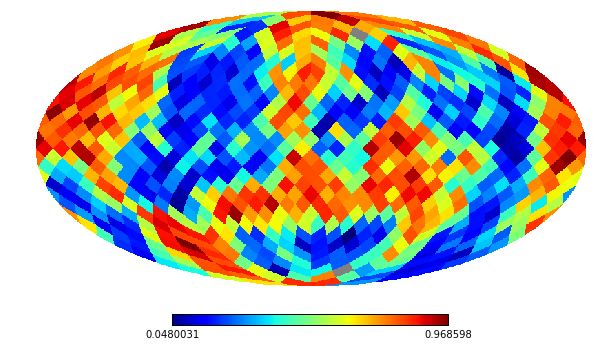

In [26]:
M_sph_R.plot_map()

In [27]:
M_sph_R.evaluate_map(inputY=X_R[:,0])

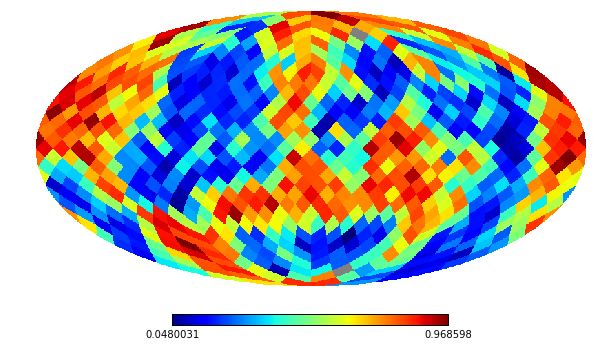

In [28]:
M_sph_R.plot_map()

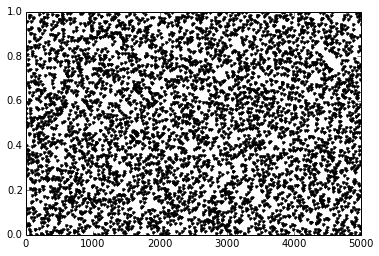

In [29]:
plt.plot(X_R[:,0],'k.')

In [30]:
M_sph_R.ivals[0]


[525, 1796, 2251, 3143, 3165, 3185]

In [31]:
HR=np.zeros(M_sph_R.npix)
MR=np.zeros(M_sph_R.npix)
for i in xrange(M_sph_R.npix):
    try:
        HR[i]=len(M_sph_R.ivals[i])
        MR[i]=np.mean(M_sph_R.yvals[i])
    except:
        pass

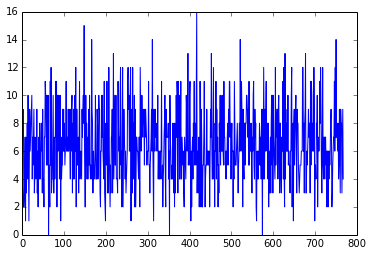

In [68]:
plt.plot(H)

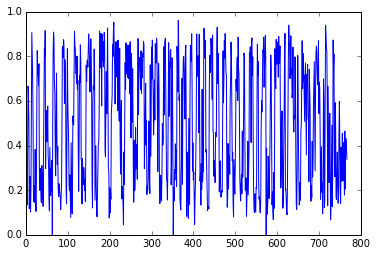

In [69]:
plt.plot(MM)

In [70]:
np.mean(H), np.mean(MM)

(6.510416666666667, 0.49416192027908679)

In [55]:
H[0]

11.0

In [56]:
np.std(H)

2.7324050443499202

(array([  13.,   39.,   47.,   90.,   94.,  127.,  100.,   76.,   66.,
          50.,   35.,   20.,    5.,    4.,    2.]),
 array([  0.        ,   1.06666667,   2.13333333,   3.2       ,
          4.26666667,   5.33333333,   6.4       ,   7.46666667,
          8.53333333,   9.6       ,  10.66666667,  11.73333333,
         12.8       ,  13.86666667,  14.93333333,  16.        ]),
 <a list of 15 Patch objects>)

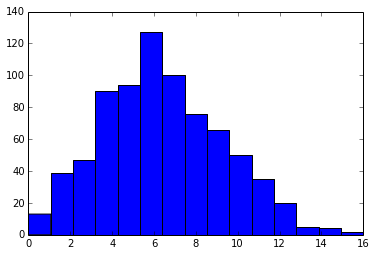

In [72]:
plt.hist(H, bins=15)


(array([  5.,  14.,  46.,  60.,  64.,  61.,  30.,  33.,  38.,  25.,  31.,
         31.,  35.,  34.,  42.,  43.,  63.,  61.,  40.,  12.]),
 array([ 0.        ,  0.04798922,  0.09597844,  0.14396766,  0.19195688,
         0.2399461 ,  0.28793533,  0.33592455,  0.38391377,  0.43190299,
         0.47989221,  0.52788143,  0.57587065,  0.62385987,  0.67184909,
         0.71983831,  0.76782753,  0.81581675,  0.86380598,  0.9117952 ,
         0.95978442]),
 <a list of 20 Patch objects>)

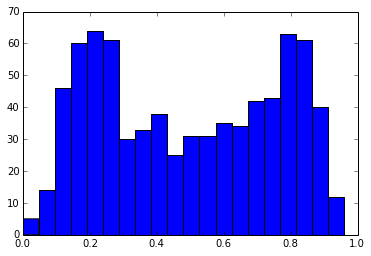

In [74]:
plt.figure()
plt.hist(MM, bins=20)

(array([  27.,   92.,   99.,   83.,   83.,   85.,   71.,  101.,  101.,   26.]),
 array([ 0.05620335,  0.14474298,  0.23328261,  0.32182224,  0.41036187,
         0.4989015 ,  0.58744113,  0.67598075,  0.76452038,  0.85306001,
         0.94159964]),
 <a list of 10 Patch objects>)

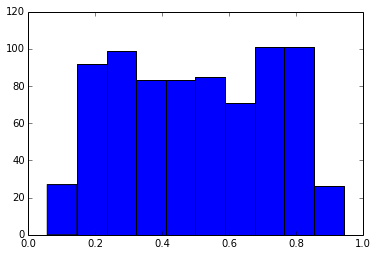

In [83]:
plt.hist(M_sph_R.weights[4])

In [77]:
len(M_sph_R.weights[0])

768

In [6]:
M_sph=somsphere.SelfMap(Data_X, Data_Y,topology='sphere', Ntop=8, iterations=100)

In [7]:
M_sph.create_map()

In [8]:
M_sph.evaluate_map()

/Users/Matias/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/cbook.py:122: MatplotlibDeprecationWarning: The matplotlib.mpl module was deprecated in version 1.3. Use `import matplotlib as mpl` instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


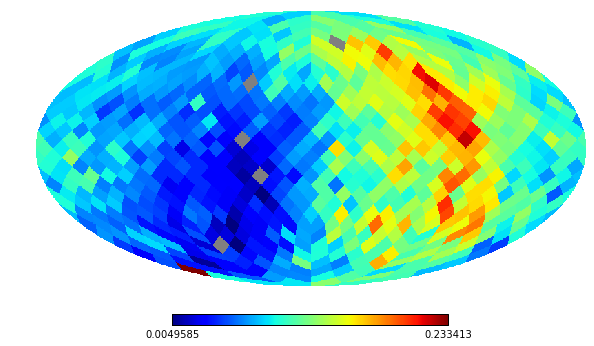

In [9]:
M_sph.plot_map()

In [10]:
H=np.zeros(M_sph.npix)
MM=np.zeros(M_sph.npix)
for i in xrange(M_sph.npix):
    try:
        H[i]=len(M_sph.ivals[i])
        MM[i]=np.mean(M_sph.yvals[i])
    except:
        pass

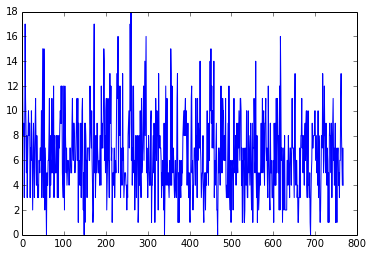

In [11]:
plt.plot(H)

(array([  33.,   94.,  182.,  200.,   71.,   97.,   62.,   17.,    8.,    4.]),
 array([  0. ,   1.8,   3.6,   5.4,   7.2,   9. ,  10.8,  12.6,  14.4,
         16.2,  18. ]),
 <a list of 10 Patch objects>)

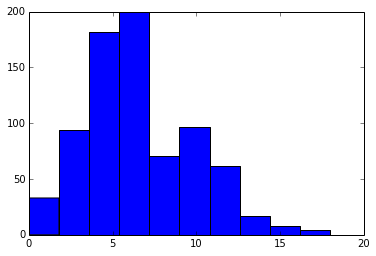

In [14]:
plt.hist(H)

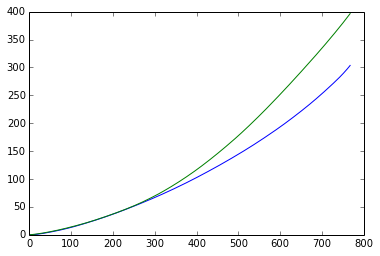

In [53]:
MM1=(MM-np.min(MM))
MM1/=np.max(MM1)
MR1=(MR-np.min(MR))
MR1/=np.max(MR1)
plt.plot(np.cumsum(np.sort(MM1)))
plt.plot(np.cumsum(np.sort(MR1)))

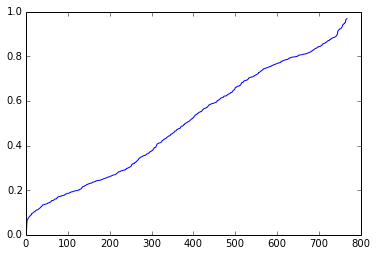

In [47]:
plt.plot(np.sort(MR))

(array([ 0.22135417,  1.25      ,  1.6015625 ,  0.92447917,  0.83333333,
         0.87239583,  1.015625  ,  1.22395833,  1.51041667,  0.546875  ]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

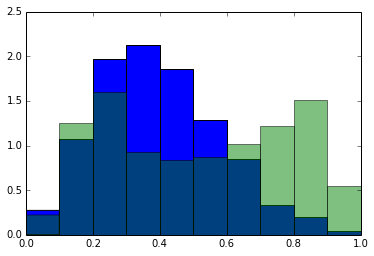

In [54]:
plt.hist(MM1, normed=True)
plt.hist(MR1, normed=True, alpha=0.5)